In [8]:
# import OS module
import os
from fnmatch import fnmatch
import pandas as pd
import density_app.functions.density_calc as calc


final_data = pd.DataFrame({'Date': [],
                        'Cell Name': [],
                        'Temperature':[],
                        'Density':[],
                        'Density Error':[],
                        'Density (with Paramagentic term)': [],
                        'Density (with para sanity check)': [],
                        '[Rb]_para1-[Rb]_para2': [],
                        'Density Error (with Paramagentic term)': [],
                        'Killian Value':[],
                        'D1 Resonance':[],
                        'D2 Resonance':[],
                        'Probe Beam':[] })

def get_info_from_fname(processed_filepath):
    #split the file path by / 
    fp_ary = str(processed_filepath).split('/')
    #take the last element of the array to get the file name
    #split that on . to separate extension from rest of name
    properties = fp_ary[-1].split('.')[0].split('_')
    #need to get the following params from the 
    col_date = properties[0]
    cell_name = properties[1].split('-')[1]
    temperature = properties[2].split('-')[1]
    wavelen = float(fp_ary[-3][:-2].replace('_','.'))
    return col_date, cell_name, float(temperature), wavelen


D1_res = 7.94768E-5
D2_res = 7.80032E-5
optical_length = 3.7



# Get the list of all files and directories
path = "/Users/eleanor/Desktop/DatatoReprocess/"

root = path
pattern = "*processed.csv"



for path, subdirs, files in os.walk(root):
    for name in files:
        if fnmatch(name, pattern):
            file = os.path.join(path, name)   
            my_date, cellname, temp, wl = get_info_from_fname(file)
            wl = wl*10**(-7)
            bfield, rots, mae, std = calc.get_processed_data_from_csv(file)
            my_data = pd.DataFrame({"Magnetic Field (Gauss)": bfield,
                                       "Rotation (Radians)": rots, 
                                       "Rotation Standard Deviation": std})
            res = calc.get_my_data_no_file(my_date, cellname, temp, my_data, D1_res, D2_res, wl, optical_length, isPositive=False)
            final_data = pd.concat([final_data, res])


#put the calculations in a csv
output_file = 'density_with_paramag_term_comparison.csv'
final_data.to_csv(output_file)


In [1]:
# import OS module
import os
from fnmatch import fnmatch
import pandas as pd
import density_app.functions.density_calc as calc


final_data = pd.DataFrame({'Date': [],
                        'Cell Name': [],
                        'Temperature':[],
                        'Density':[],
                        'Density Error':[],
                        'Density (with Paramagentic term)': [],
                        'Density (with para sanity check)': [],
                        '[Rb]_para1-[Rb]_para2': [],
                        'Density Error (with Paramagentic term)': [],
                        'Killian Value':[],
                        'D1 Resonance':[],
                        'D2 Resonance':[],
                        'Probe Beam':[] })

def get_info_from_fname(processed_filepath):
    #split the file path by / 
    fp_ary = str(processed_filepath).split('/')
    #take the last element of the array to get the file name
    #split that on . to separate extension from rest of name
    properties = fp_ary[-1].split('.')[0].split('_')
    #need to get the following params from the 
    col_date = properties[0]
    cell_name = properties[1].split('-')[1]
    temperature = properties[2].split('-')[1]
    wavelen = float(fp_ary[-3][:-2].replace('_','.'))
    return col_date, cell_name, float(temperature), wavelen


D1_res = 7.94768E-5
D2_res = 7.80034E-5
optical_length = 3.7



# Get the list of all files and directories
path = "/Users/eleanor/Desktop/DatatoReprocess/9-13"

root = path
pattern = "*processed.csv"



for path, subdirs, files in os.walk(root):
    for name in files:
        if fnmatch(name, pattern):
            file = os.path.join(path, name)   
            my_date, cellname, temp, wl = get_info_from_fname(file)
            wl = wl*10**(-7)
            bfield, rots, mae, std = calc.get_processed_data_from_csv(file)
            my_data = pd.DataFrame({"Magnetic Field (Gauss)": bfield,
                                       "Rotation (Radians)": rots, 
                                       "Rotation Standard Deviation": std})
            res = calc.get_my_data_no_file(my_date, cellname, temp, my_data, D1_res, D2_res, wl, optical_length, isPositive=False)
            final_data = pd.concat([final_data, res])


#put the calculations in a csv
output_file = '09132024_density_with_paramag_term_comparison.csv'
final_data.to_csv(output_file)

7.79758e-05 ,  4154230161408.0
7.79791e-05 ,  3212724101120.0
7.79812e-05 ,  2676490702848.0
7.79843e-05 ,  1974331183104.0
7.7987e-05 ,  1449644204032.0
7.79897e-05 ,  1005837438976.0
7.79921e-05 ,  679241961472.0
7.79935e-05 ,  518239768576.0
7.79955e-05 ,  325958549504.0
7.7998e-05 ,  148014596096.0
7.80127e-05 ,  504293273600.0
7.8016e-05 ,  913786130432.0
7.80178e-05 ,  1188070445056.0
7.80207e-05 ,  1705583173632.0
7.80237e-05 ,  2339129073664.0
7.80301e-05 ,  4024421564416.0


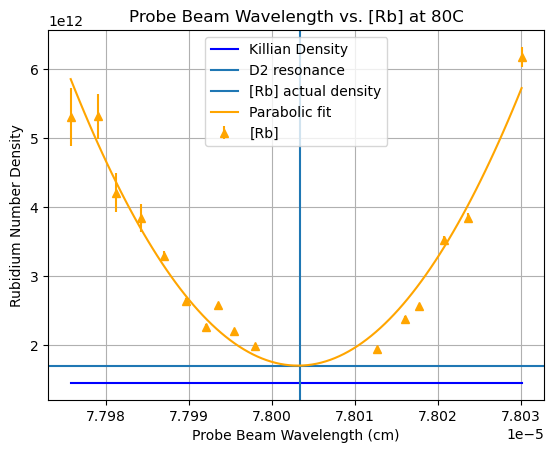

1701643964416.0


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import density_app.functions.density_calc as calc


temperature = 80
d1_resonance = 7.94768E-5
d2_resonance = 7.80034E-5
optical_length = 3.7


#Files
file1 = 'density_with_wl_comparison_09132024.csv'
file2 = 'density_with_wl_comparison_09132024_verdet.csv'


def fun(d1_res, d2_res, o_len, laser_wave, temp):
    prefactor = (calc.mu_b*o_len*calc.q_electron**2)/(6*calc.m_electron*calc.h*calc.light_speed)
    delta_wl_d1 = d1_res-laser_wave
    delta_wl_d2 = d2_res-laser_wave
    T = calc.convertTtoKelvin(temp)
    term1 = (laser_wave**2/(3*calc.light_speed**2))*((4*d1_res**2)/delta_wl_d1**2+(7*d2_res**2)/delta_wl_d2**2-(2*d1_res*d2_res)/(delta_wl_d2*delta_wl_d1))
    term2 = (calc.h*laser_wave/(calc.k_b*T*calc.light_speed))*(d1_res/delta_wl_d1 - d2_res/delta_wl_d2)
    F = prefactor*(term1 - term2)
    return F

#Get data from specified fiel
def get_plot_data(file, T):
    data_unsorted = pd.read_csv(file)
    data = data_unsorted.sort_values('Probe Beam')
    killian_density = data.loc[data['Temperature']== T, 'Killian Value']
    paramag_density = data.loc[data['Temperature']== T, 'Density (with Paramagentic term)'].to_numpy()
    paramag_density_error = data.loc[data['Temperature']== T, 'Density Error (Frequency calc)'].to_numpy()
    probe_beam = data.loc[data['Temperature']== T, 'Probe Beam'].to_numpy()

    return killian_density, paramag_density, paramag_density_error, probe_beam

#Get parabolic fit
def get_parabolic_fit(x_data, y_data):
    model  = np.poly1d(np.polyfit(x=x_data, y=y_data, deg=2))
    return model


def get_x_for_fit(x_data, num_points):
    x_min = np.min(x_data)
    x_max = np.max(x_data)
    line = np.linspace(x_min, x_max, num_points) 
    return line

def extract_model_coeffs(model):
    a = float(model[2])
    b = float(model[1])
    c = float(model[0])
    return a, b, c

def get_fit_rb(model, wl):
    a, b, c = extract_model_coeffs(model)
    rb_prime = a*wl**2+b*wl+c
    return rb_prime


def get_parabola_extrema(model):
    a, b, c = extract_model_coeffs(model)
    min_density_wavelength = -b/(2*a)
    min_density = a*min_density_wavelength**2+b*min_density_wavelength+c
    return min_density_wavelength, min_density

def get_change_due_to_verdet(model, wl):
    a, b, c = extract_model_coeffs(model)
    min_den_wl, min_den = get_parabola_extrema(model)
    change_V = (a*wl**2+b*wl+c-min_den)
    return change_V


#*fun(d1_res, d2_res, o_len, wl, temp)/L


killian_density, paramag_density, paramag_density_error, probe_beam = get_plot_data(file1, temperature)

my_fit = get_parabolic_fit(probe_beam, paramag_density)
min_density_x, min_density = get_parabola_extrema(my_fit)

#turn on the grid
plt.grid(visible=True, which='both', axis='both')
 
#plot the data sets
plt.errorbar(x=probe_beam, y=paramag_density, yerr=paramag_density_error, color='orange', marker='^', linestyle='none', label = '[Rb]')
plt.plot(probe_beam, killian_density, 'b-', label = "Killian Density")
plt.axvline(x=d2_resonance, label = 'D2 resonance')
plt.axhline(y=min_density, label='[Rb] actual density')

#plot the parabolic fit
polyline = get_x_for_fit(probe_beam, 100)
plt.plot(polyline, my_fit(polyline), color='orange', label = 'Parabolic fit') 

y_verdet = get_change_due_to_verdet(my_fit, probe_beam)

for i in range(0, len(probe_beam)):
    print(probe_beam[i], ', ', y_verdet[i])

#plt.plot(polyline, y_verdet, color='green')

#plot display and labels
plt.title("Probe Beam Wavelength vs. [Rb] at %dC"%(temperature))
plt.legend()
plt.xlabel("Probe Beam Wavelength (cm)")
plt.ylabel("Rubidium Number Density")
plt.show()

print(min_density)



#line = verdet(derivative_coeffs, polyline)
#plt.plot(polyline, line)
#plt.show()

#for i in probe_beam1:
#    print(i, verdet(derivative_coeffs, i)/1.3)